In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cobra

In [14]:
#Importing model iYali
#yali = cobra.io.read_sbml_model('iYali.xml')
#yali = cobra.io.read_sbml_model('yalinewpathways final 2.xml')
yali = cobra.io.read_sbml_model('iYali-tidy W29 strain final 2.xml')
#yali = cobra.io.read_sbml_model('iYali-tidy Obese strain final 2.xml')
#yali = cobra.io.read_sbml_model('Yali OptKnock final.xml')

In [15]:
essentiality = {}
for gene in yali.genes:
    with yali:
        gene.knock_out()
        essentiality[gene] = yali.slim_optimize(error_value=0.)

In [16]:
df = pd.DataFrame.from_dict(essentiality, orient='index', columns=['growth'])
df = df.sort_values('growth')

<Figure size 7200x7200 with 0 Axes>

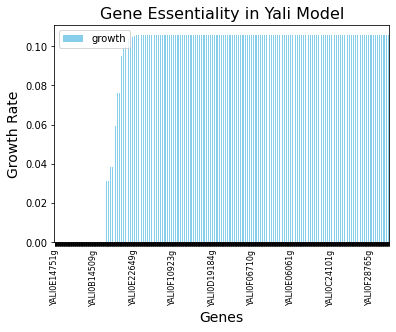

In [17]:
plt.figure(figsize=(100, 100))  # increase the figure size
ax = df.plot.bar(color='skyblue')
ax.set_xlabel('Genes', fontsize=14)
ax.set_ylabel('Growth Rate', fontsize=14)
ax.set_title('Gene Essentiality in Yali Model', fontsize=16)
plt.xticks(fontsize=8, rotation=90)  # decrease the font size and adjust rotation

# Only label every nth x-tick
n = 100  # adjust this to change the number of labels
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_new = ['' if i % n != 0 else label for i, label in enumerate(labels)]
ax.set_xticklabels(labels_new)

plt.savefig("gene_essentiality.jpg", format='jpg', dpi=500, bbox_inches='tight')

plt.show()

<Figure size 1800x1080 with 0 Axes>

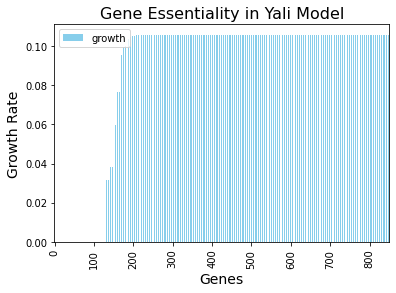

In [18]:
plt.figure(figsize=(25, 15))  # increase the figure size
ax = df.plot.bar(color='skyblue')
ax.set_xlabel('Genes', fontsize=14)
ax.set_ylabel('Growth Rate', fontsize=14)
ax.set_title('Gene Essentiality in Yali Model', fontsize=16)

# Set numerical x-axis labels
num_genes = len(df.index)
ax.set_xticks(range(0, num_genes, 100))  # set ticks at every 100th position
ax.set_xticklabels(range(0, num_genes, 100))  # set tick labels to be the same as the tick positions

plt.savefig("gene_essentiality2.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()